The purpose of this section is to visualize the trends and commonalities within Industry-sponsored Interventional Paediatrics Clinical Trials.

In [175]:
# Create a function for barcharts
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('white')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent = [x+w, x, y, y+h], 
                  aspect = 'auto', zorder = 1)
    ax.axis(lim)
    
def plotbarchart(df,indexcol,valuecol,title):
    index = df[indexcol]
    values = df[valuecol]
    plot_title = title
    title_size = 16
    df.sort_values(by = valuecol, inplace = True, ascending = False)
    fig, ax = plt.subplots(figsize = (8,4), 
                           facecolor = 'white')
    mpl.pyplot.viridis()
    
    bar = ax.barh(index, values)
    plt.tight_layout()
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    title = plt.title(plot_title, pad = 20, fontsize = title_size)
    title.set_position([.33, 1])
    plt.subplots_adjust(top = 0.9, bottom = 0.1)
    ax.set_xlabel(valuecol, fontsize = 12)
    ax.set_ylabel(indexcol, fontsize = 12)
    ax.set_facecolor('white')
    plt.yticks(fontsize = 12)
    ax.grid(zorder = 0)
    gradientbars(bar)
    
    rects = ax.patches
    # Place a label for each bar
    for rect in rects:
        # Get X and Y placement of label from rect
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        # Number of points between bar and label; change to your liking
        space = -50
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: place label to the left of the bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label to the right
            ha = 'right'
        # Use X value as label and format number
        label = '{:,.0f}'.format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at bar end
            xytext = (space, 0),          # Horizontally shift label by `space`
            textcoords = 'offset points', # Interpret `xytext` as offset in points
            va = 'center',                # Vertically center label
            ha = ha,                      # Horizontally align label differently for positive and negative values
            color = 'white',            # Change label color to white
            fontsize = 16)

In [176]:
# Create a function for subplots (indicating the outcome measures)
def subplots_2(df,yvalue,title):
    fig = make_subplots(rows = 1, cols = 2, 
                        specs = [[{}, {}]], shared_xaxes = True,
                        shared_yaxes = False, vertical_spacing = 0.001)

    fig.add_trace(go.Bar(x = df['2012-2022 Total'], 
                            y = df[yvalue],
                            marker = dict(color = 'rgb(173,216,230)',
                            line = dict(color = 'rgb(173,216,230)',
                                        width = 1.5),),
                            name = 'FY2012-FY2022 Total',
                            orientation = 'h'),1, 1)

    fig.append_trace(go.Scatter(x = df['2021 Total'],
                                y = df[yvalue],
                                mode = 'lines+markers',
                                line_color = 'rgb(0,0,128)',
                                name = 'Year 2021 only',), 1, 2)

    fig.update_layout(title = title, 
                      yaxis = dict(showgrid = False,
                                   showline = False,
                                   showticklabels = True,
                                   domain = [0, 1],
                                   ),
                      yaxis2 = dict(showgrid = False,
                                    showline = True,
                                    showticklabels = False,
                                    linecolor = 'rgb(105,105,105)',
                                    linewidth = 2,
                                    domain = [0, 1],
                                    ),
                      xaxis = dict(zeroline = False,
                                   showline = False,
                                   showticklabels = True,
                                   showgrid = True,
                                    domain = [0,0.42],
                                    ),
                      xaxis2 = dict(zeroline = False,
                                    showline = True,
                                    showticklabels = True,
                                    showgrid = True,
                                    domain = [0.42, 1],
                                    side = 'top',
                                    dtick = 5000,
                                    ),
                      legend = dict(x = 0.6,
                                    y = 1.038,
                                    font_size = 9),
                      margin = dict(l = 5, r = 5, t = 40, b = 10),
                      paper_bgcolor = 'rgb(255,255,255)',
                      plot_bgcolor = 'rgb(255,255,255)',)

    y_s = df['2012-2022 Total']
    y_nw = df['2021 Total']

    annotations = []
    x = df[yvalue]
    # Adding labels
    for ydn, yd, xd in zip(y_nw, y_s, x):
        # labeling the scatter plot 
        annotations.append(dict(xref = 'x2', yref = 'y2',
                                xshift = 20, yshift = 5,
                                y = xd, x = ydn,
                                text = ydn,
                                font = dict(family = 'Arial', size = 10,
                                            color='rgb(0,0,0)'),
                                showarrow=False))
        # labeling the bar 
        annotations.append(dict(xref = 'x1', yref = 'y1',
                                xshift = 20,  
                                y = xd, x = yd,
                                text = yd,
                                font = dict(family = 'Arial', size = 10,
                                            color = 'rgb(0,0,0)'),
                                showarrow = False))

    fig.update_layout(annotations=annotations)

    fig.show()

In [177]:
# Create a function for piecharts
# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

def plot(df,column,title):
    labels = df[column].value_counts().index
    values = df[column].value_counts().values
    fig = go.Figure(data = [go.Pie(labels = labels, values = values, 
                                   hole = 0.4)])

    fig.update_layout(autosize = True, height = 400, width = 450,
                      margin = dict(t = 80, b = 20, l = 2, r = 2),
                      title_text = title,
                      titlefont = dict(size = 16, color = 'black'),
                      font = dict(color = 'black'),
                      legend = dict(orientation = "h", 
                                    yanchor = "bottom",
                                    y = 0.6,
                                    xanchor = "right", x = 2))
    fig.show()

In [178]:
# Create a function to save the figures and charts
def save_fig(title, tight_layout = True):
    path = os.path.join('/project/Python/', "images/", title + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png')
    print(title + '.png saved')

In [179]:
#  Examine the numerical attributes of the dataset
interventional_studies.describe()

,No of Participants,Study Duration (in days),Year Started,Number of Arms,Number of Clinical Trial Sites,Number of countries,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Bangladesh,Belarus,Belgium,Belize,Benin,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Central African Republic,Chile,China,Colombia,Congo,Costa Rica,Croatia,Czech Republic,Czechia,Côte DIvoire,Denmark,Dominican Republic,Egypt,El Salvador,Equatorial Guinea,Estonia,Ethiopia,Faroe Islands,Federated States of Micronesia,Finland,Former Serbia and Montenegro,France,French Guiana,...,Vanuatu,Vietnam,Virgin Islands (U.S.),Zambia,Zimbabwe,Outcome Measures (Y/N),Outcome Measures - No,Outcome Measures - patient diary,Outcome Measures - questionnaire,INTERVENTION Procedure (Y/N),INTERVENTION Biological (Y/N),INTERVENTION Drug (Y/N),INTERVENTION Diagnostic Test (Y/N),INTERVENTION Device (Y/N),INTERVENTION Dietary Supplement (Y/N),INTERVENTION Radiation (Y/N),INTERVENTION Behavioral (Y/N),INTERVENTION Procedure - 6 minute walk,INTERVENTION Procedure - No,INTERVENTION Procedure - aphaeresis,INTERVENTION Procedure - biopsy,INTERVENTION Procedure - blood collection,INTERVENTION Procedure - cognitive test,INTERVENTION Procedure - echocardiogram,INTERVENTION Procedure - electrocardiogram,INTERVENTION Procedure - electroencephalogram,INTERVENTION Procedure - endoscopy,INTERVENTION Procedure - implantation,INTERVENTION Procedure - lumbar puncture,INTERVENTION Procedure - magnetic resonance imaging,INTERVENTION Procedure - physical examination,INTERVENTION Procedure - pregnancy test,INTERVENTION Procedure - rehabilitation,INTERVENTION Procedure - surgery,INTERVENTION Procedure - ultrasound,INTERVENTION Procedure - urinalysis,INTERVENTION Procedure - xray,Drug/Biological Delivery - Nil,Drug/Biological Delivery - buccal,Drug/Biological Delivery - cutaneous,Drug/Biological Delivery - inhalation,Drug/Biological Delivery - injection,Drug/Biological Delivery - nasal,Drug/Biological Delivery - nebulization,Drug/Biological Delivery - ocular,Drug/Biological Delivery - oral,Drug/Biological Delivery - otic,Drug/Biological Delivery - sublingual,Drug/Biological Delivery - transdermal,Drug/Biological Delivery - vaginal
count,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.0,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,...,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000,3831.000000
mean,451.021665,882.645262,2017.217437,1.457844,15.616027,3.727747,0.0,0.001827,0.000261,0.040981,0.000783,0.097364,0.040981,0.003132,0.003654,0.093448,0.001566,0.000261,0.000522,0.001566,0.001827,0.050378,0.040981,0.003132,0.000783,0.000261,0.161055,0.000261,0.019055,0.098930,0.022709,0.002349,0.003393,0.012268,0.001305,0.056904,0.000783,0.046463,0.006004,0.003393,0.000783,0.000261,0.015140,0.000261,0.000261,0.000261,0.030801,0.000522,0.141216,0.000261,...,0.000261,0.010702,0.000261,0.000783,0.001044,0.338032,0.661968,0.097103,0.287914,0.4

In [180]:
interventional_studies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3831 entries, 1 to 7978
Columns: 230 entries, TRIAL ID (NCT number) to Placebo (Y/N)
dtypes: category(4), datetime64[ns](2), float64(9), int64(179), object(36)
memory usage: 6.8+ MB


#### 3.1  General Trial Characteristics 

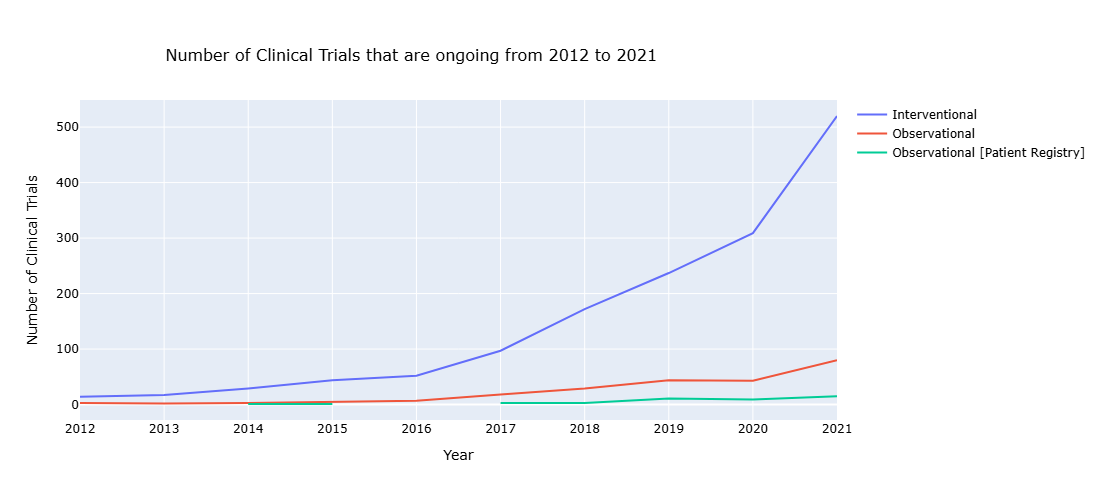

In [181]:
# Graph 1 - 
# Growth of clinical trials over the years by Study Type

def trend():
    # Create a new dataframe that removes clinical trials that started in 2022
    df2 = For_EDA.loc[(For_EDA['Year Started'] != 2022) & (For_EDA['STATUS (active/recruiting)'] != 'Completed')]
    StudyType_Time = df2.groupby(["Year Started", "Study Type"])['TRIAL ID (NCT number)'].count().reset_index()

    # Plot the line chart
    fig = go.Figure()
    ax = StudyType_Time.pivot(index = "Year Started", 
                              columns = "Study Type", 
                              values = 'TRIAL ID (NCT number)')

    for col in ax.columns:
        fig.add_trace(go.Scatter(x = ax.index, y = ax[col].values,
                                     name = col,
                                     mode = 'lines'))
    # format and show figure
        fig.update_layout(height = 500, width = 700,
                          yaxis_title = "Number of Clinical Trials",
                          xaxis_title = "Year",
                          title = {'text':'Number of Clinical Trials that are ongoing from 2012 to 2021',
                          'xanchor':'left','y':0.9,'x':0.15},
                          title_font = dict(size = 16,color = 'black'),
                          font = dict(color = 'black'))
    fig.show()
    
trend()

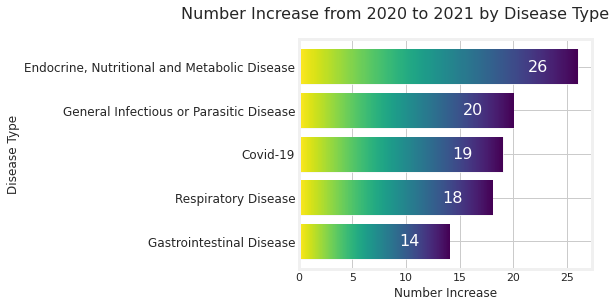

In [182]:
# Graph 2 - 
# Clinical Trials that reported the highest growth in 2021 by Disease Type

# Create new dataframe
DiseaseStudied = interventional_studies.groupby(["Year Started", "Disease Type"])['TRIAL ID (NCT number)'].count().reset_index()

# Remove Unclassified diseases from the dataframe
DiseaseStudied = DiseaseStudied[DiseaseStudied['Disease Type'] != 'Others']
# Create a new dataframe that includes clinical trials starting from 2020 and 2021 only

# 2020 dataframe
DiseaseStudied_2020 = DiseaseStudied[DiseaseStudied['Year Started'] == 2020]

# 2021 dataframe
DiseaseStudied_2021 = DiseaseStudied[DiseaseStudied['Year Started'] == 2021]

# Calculate the yearly difference in clinical trial
DiseaseStudied_20202021 = pd.merge(DiseaseStudied_2021,DiseaseStudied_2020,on = ["Disease Type"])
DiseaseStudied_20202021['Number Increase'] = DiseaseStudied_20202021['TRIAL ID (NCT number)_x']-DiseaseStudied_20202021['TRIAL ID (NCT number)_y']
DiseaseStudied_20202021 = DiseaseStudied_20202021.drop(columns = ['TRIAL ID (NCT number)_x','TRIAL ID (NCT number)_y','Year Started_x','Year Started_y']
                                        ).sort_values(by = 'Number Increase',ascending = True).reset_index().drop(columns=['index'])[11:]

# plot the graph
plotbarchart(DiseaseStudied_20202021,'Disease Type','Number Increase','Number Increase from 2020 to 2021 by Disease Type')


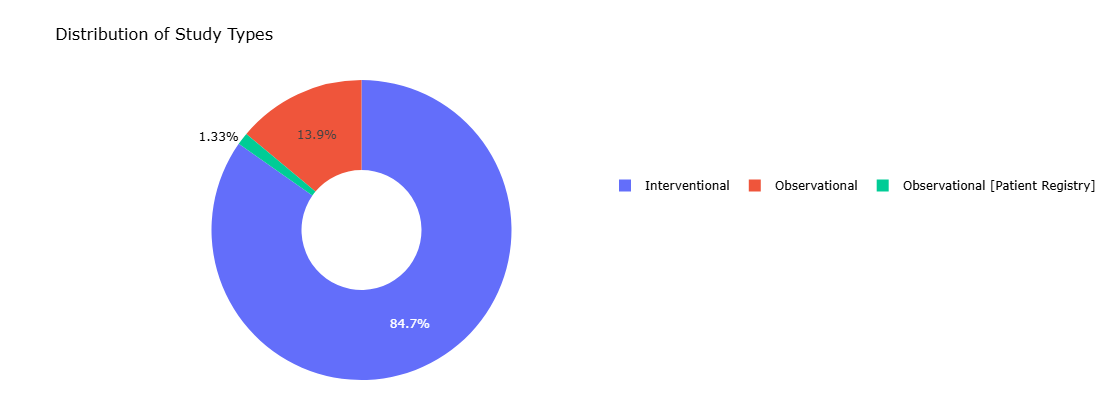

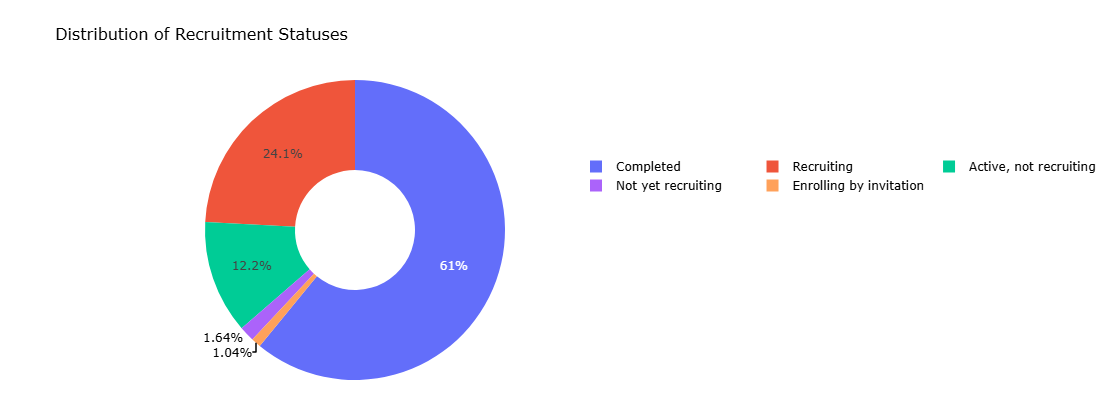

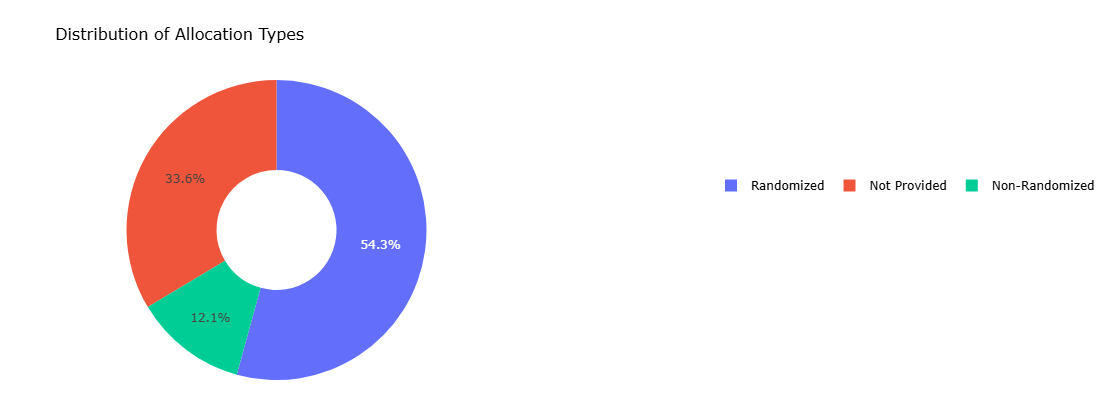

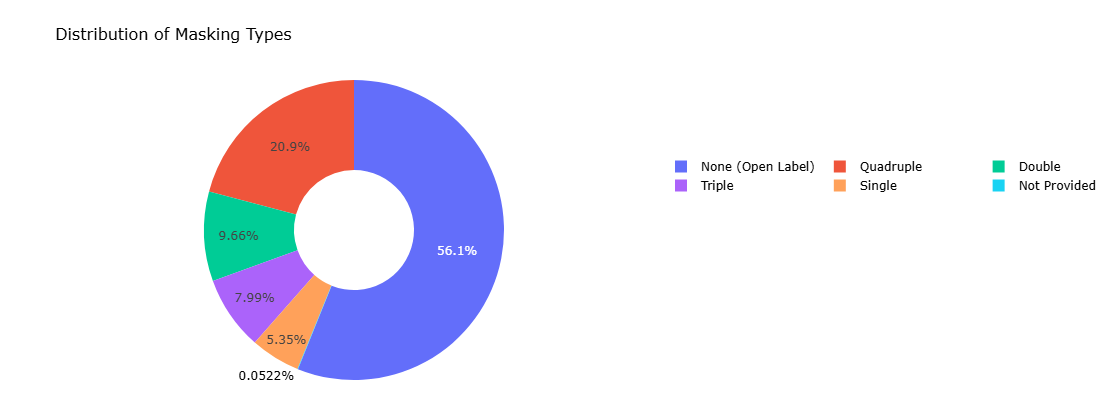

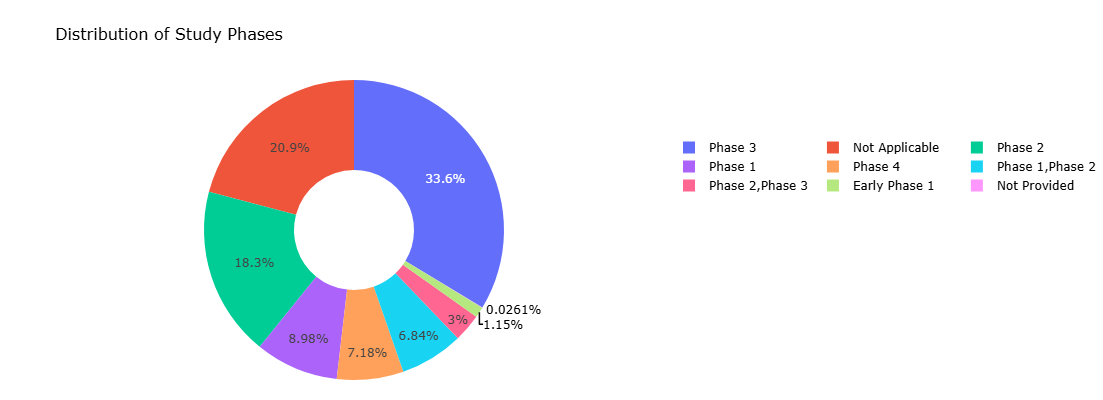

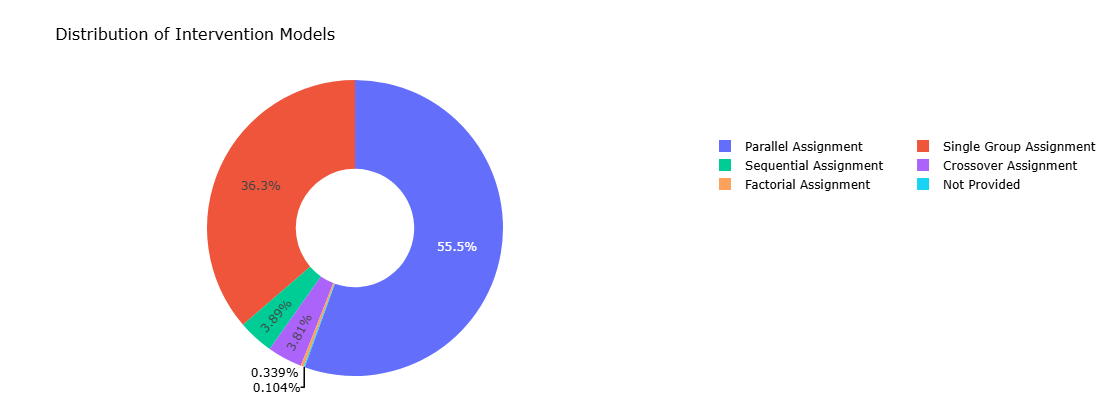

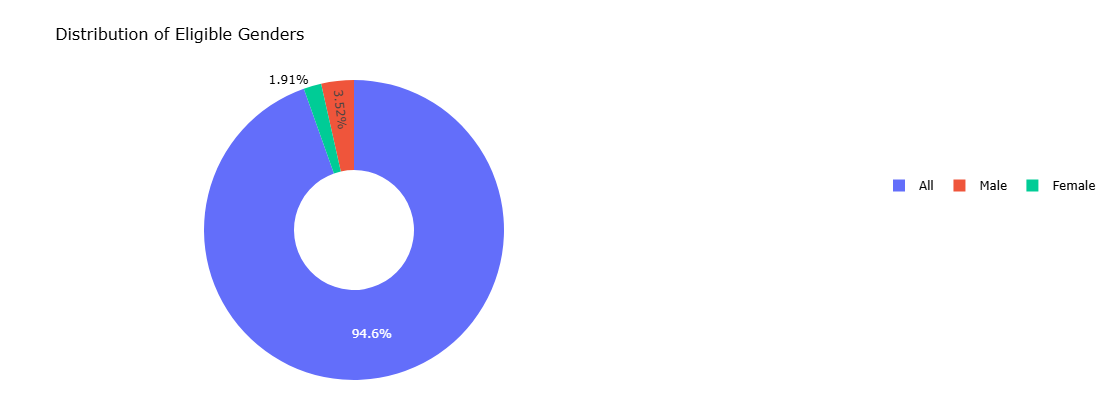

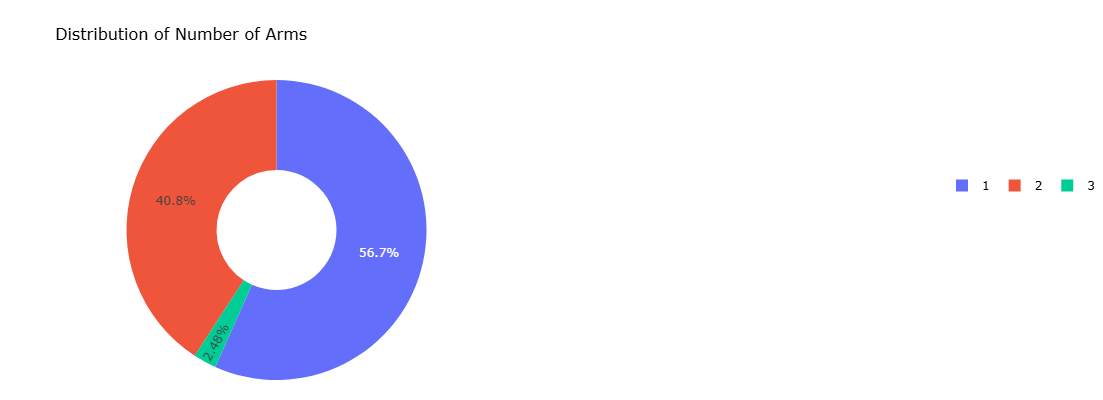

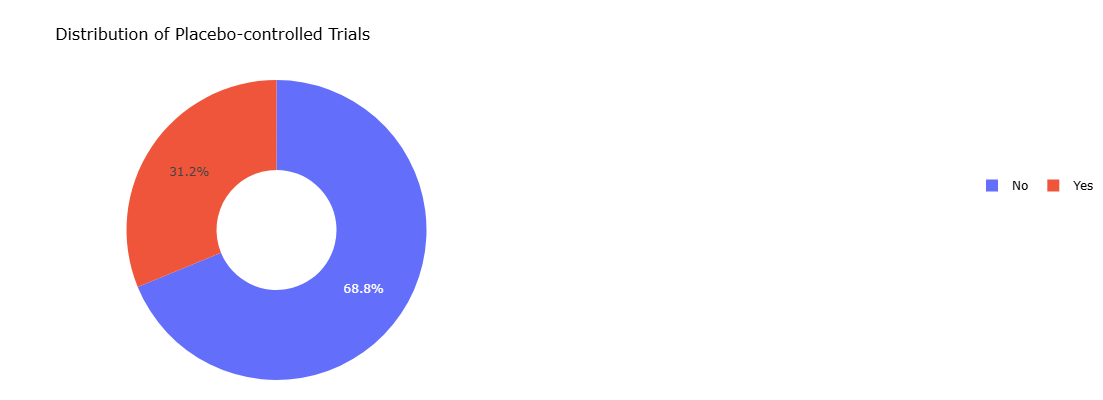

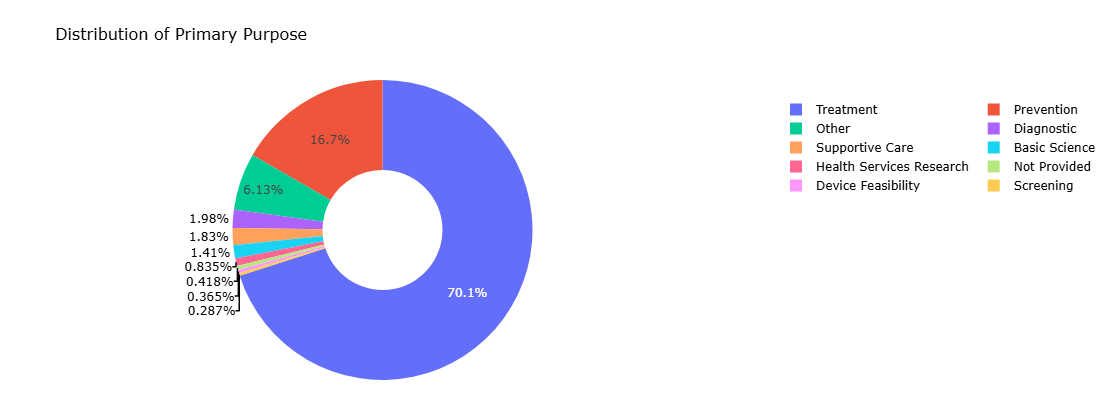

In [183]:
# Graph 3 - 
# Distribution of Clinical Trial by study types
plot(df,'Study Type','Distribution of Study Types')

# Graph 4 - 
# Distribution of Clinical Trial by Recruitment Status
plot(interventional_studies,'STATUS (active/recruiting)','Distribution of Recruitment Statuses')

# Graph 5 - 
# Distribution of Clinical Trial by Recruitment Status
plot(interventional_studies,'Allocation','Distribution of Allocation Types')

# Graph 6 - 
# Distribution of Clinical Trial by Masking Types
plot(interventional_studies,'Masking','Distribution of Masking Types')

# Graph 7 - 
# Distribution of Clinical Trial by Study Phases
plot(interventional_studies,'Phase','Distribution of Study Phases')

# Graph 8 - 
# Distribution of Clinical Trial by Intervention Models
plot(interventional_studies,'Intervention Model','Distribution of Intervention Models')

# Graph 9 - 
# Distribution of Clinical Trial by Eligible Genders
plot(interventional_studies,'Gender','Distribution of Eligible Genders')

# Graph 10 - 
# Distribution of Clinical Trial by Number of Arms
plot(interventional_studies,'Number of Arms','Distribution of Number of Arms')

# Graph 11 - 
# Distribution of Clinical Trial with Placebo Control
interventional_studies.loc[interventional_studies['Placebo (Y/N)'] == 1,'Placebo (Y/N)'] = 'Yes'
interventional_studies.loc[interventional_studies['Placebo (Y/N)'] == 0,'Placebo (Y/N)'] = 'No'
plot(interventional_studies,'Placebo (Y/N)','Distribution of Placebo-controlled Trials')

# Graph 12 - 
# Distribution of Clinical Trial with Placebo Control
plot(interventional_studies,'Primary Purpose','Distribution of Primary Purpose')

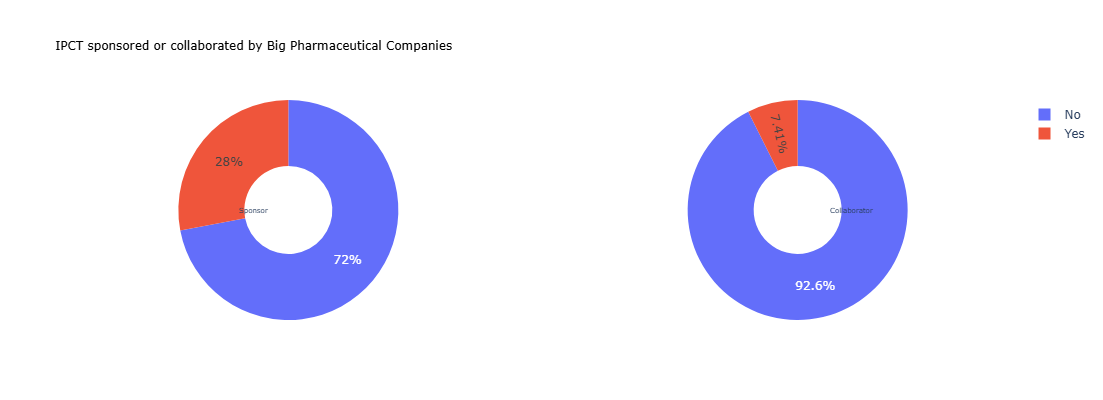

In [184]:
# Graph 13 -
# Distribution of clinical trials sponsored or collaborated by Top-50 ranked Pharmaceutical companies

def sponsorplot():
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])

    # Sponsor count
    fig.add_trace(go.Pie(labels=interventional_studies['Big Names Sponsors (Y/N)'].value_counts().index, 
                         values=interventional_studies['Big Names Sponsors (Y/N)'].value_counts().values,
                         name="Sponsors"),1, 1)

    # Collaborator count
    fig.add_trace(go.Pie(labels=interventional_studies['Big Names Collaborators (Y/N)'].value_counts().index,
                         values=interventional_studies['Big Names Collaborators (Y/N)'].value_counts().values,
                         name="Collaborators"),1, 2)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole = .4)

    # Plot the pie chart
    fig.update_layout(
        autosize = True, height = 400, width = 450,
        title_text="IPCT sponsored or collaborated by Big Pharmaceutical Companies",
        titlefont = dict(size = 12, color = 'black'),
        # Add annotations in the center of the donut pies.
        annotations = [dict(text='Sponsor', x = 0.17, y = 0.5, font_size = 7, showarrow=False),
                       dict(text='Collaborator', x = 0.86, y = 0.5, font_size = 7, showarrow=False)])
    fig.show()
    
sponsorplot()

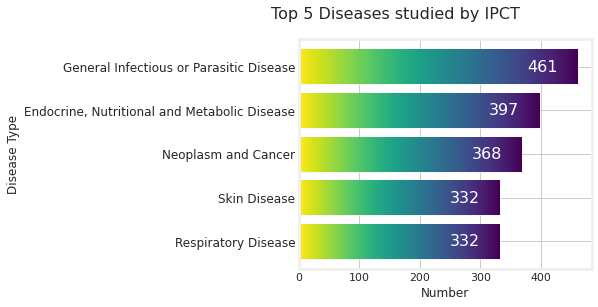

In [130]:
# Graph 14 -
# Top 5 disease studied by IPCT 

DiseaseStudied = interventional_studies[(interventional_studies['Disease Type'] != 'Others')]
DiseaseStudied = DiseaseStudied.groupby([ "Disease Type"])[
                        'TRIAL ID (NCT number)'].count().reset_index().sort_values(
                        by='TRIAL ID (NCT number)',ascending=True)[11:]

# Rename column
renamecol(DiseaseStudied ,"TRIAL ID (NCT number)","Number")

# Plot the bar chart
plotbarchart(DiseaseStudied,'Disease Type','Number','Top 5 Diseases studied by IPCT')


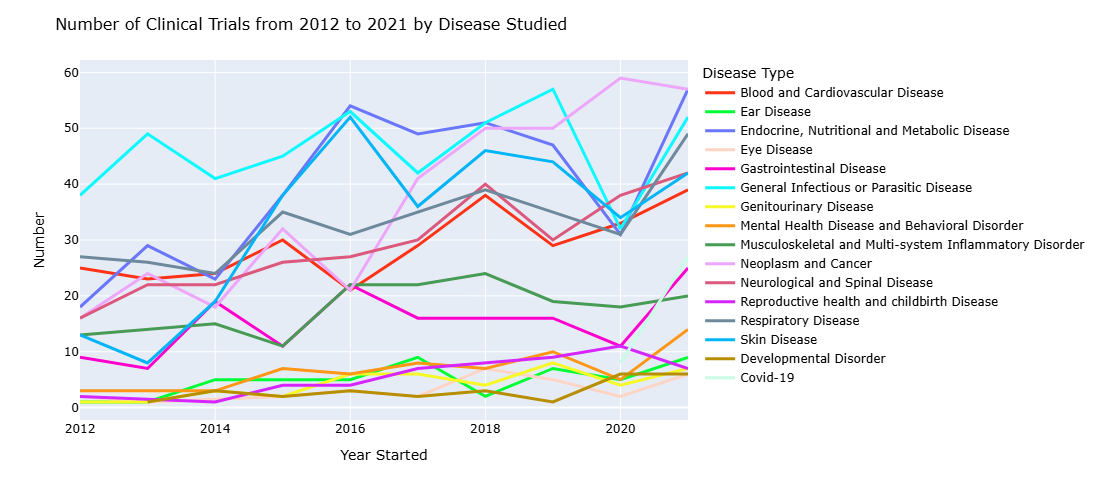

In [131]:
# Graph 15 -
# Number of IPCT by disease studied per year
# Only showing the top 10 diseases

def diseaseplt():
    condition = interventional_studies[(interventional_studies['Disease Type'] != 'Others') & 
                                      (interventional_studies['Year Started'] != 2022)]
    condition = condition.groupby(["Year Started", "Disease Type"])['TRIAL ID (NCT number)'].count().reset_index()
    condition = condition.rename(columns = {"TRIAL ID (NCT number)": "Number"})
    Top_diseases = condition.reset_index().drop(columns = 'index').rename(columns={"TRIAL ID (NCT number)": "Number"}
                                                                      ).sort_values(by = 'Number',ascending=True)

    condition_2 = condition[condition['Disease Type'].isin(list(Top_diseases['Disease Type'].unique()))]

    fig = px.line(condition_2, x = 'Year Started', y = 'Number',
                  color='Disease Type',
                  color_discrete_sequence = px.colors.qualitative.Light24,
                  line_group = "Disease Type", 
                  hover_name = "Disease Type")

    fig.update_layout(title = 'Number of Clinical Trials from 2012 to 2021 by Disease Studied', 
                      height = 500, width = 800, 
                      title_font = dict(size = 16,color='black'),
                      font = dict(color = 'black'),
                      showlegend = True)

    fig.update_traces(line = dict(width = 3))
    fig.show()
    
diseaseplt()

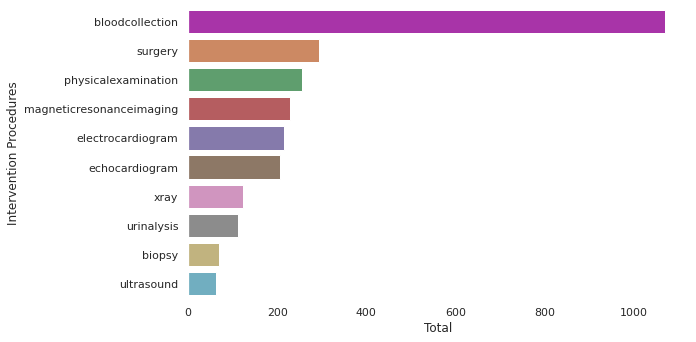

In [132]:
# Graph 16 -
# Top 10 Intervention Procedures

Procedures = interventional_studies[(interventional_studies['INTERVENTION Procedure'] != 'nil')]
list_= Procedures['INTERVENTION Procedure'].dropna().to_list()
list_2 = [row for row in list_ if row.strip()]
text = str(list_2)
text = re.sub(r"[-()[]\"''#/@;:<>{}`+=~|.!?]", "",text).lower()
text = text.replace("[",'').replace("'",'').replace(" ",'')

# Count the number of occurence of each procedure
d=dict()
for word in text.split(','):
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
        
# Convert the dictionary into a dataframe format 
Procedures_combined = pd.DataFrame.from_dict([d]).T
Procedures_combined.index.name = 'Intervention Procedures'
Procedures_combined = Procedures_combined.reset_index().rename(columns = {0:"Total"})
Procedures_combined = Procedures_combined.loc[Procedures_combined['Intervention Procedures'] != 'no']
Procedures_combined.to_excel('/project/Python/Intervention_Procedures.xlsx')
Procedures_combined =  Procedures_combined.sort_values(by = 'Total',ascending = False)[:10]
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})

bar = sns.barplot(x =  'Total',
                  y ='Intervention Procedures', 
                  data = Procedures_combined,
                  orient='h')
                  
patch_h = [patch.get_height() for patch in bar.patches]   # patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)  # np.argmax return the index of largest value of the list

# plot the histogram
bar.patches[idx_tallest].set_facecolor('#a834a8')

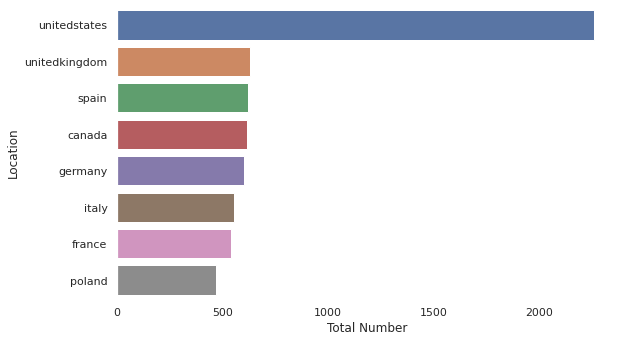

In [133]:
# Graph 17 -
# Top 10 Countries  

Countries = interventional_studies[(interventional_studies['Listed Location Countries']!='republicof') & 
                                      (interventional_studies['Listed Location Countries']!='notprovided')]

# Count the number of occurence in each country
list_= Countries['Listed Location Countries'].dropna().to_list()
list_2 = [row for row in list_ if row.strip()]
text = str(list_2)
text = re.sub(r"[-()[]\"''#/@;:<>{}`+=~|.!?]", "",text).lower()
text = text.replace("[",'').replace("'",'').replace(" ",'')
d = dict()
for word in text.split(','):
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
        
Countries = pd.DataFrame.from_dict([d]).T
Countries.index.name = 'Location'
Countries = Countries.reset_index().rename(columns={0:"Total Number"}).sort_values(by = 'Total Number',ascending=False)[:8]

Countries.to_excel('/project/Python/countrylist.xlsx')
# plot
bar = sns.barplot(x ='Total Number', 
                  y =  'Location',
                  data = Countries)
              

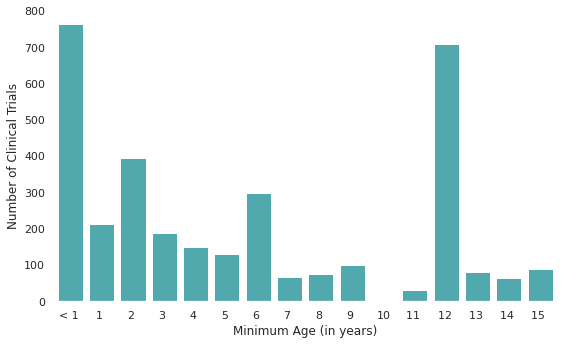

In [134]:
# Graph 18 -
# Distribution of Minimum Age Eligibility

Min_Age = interventional_studies.groupby(["Age (min) years"])['TRIAL ID (NCT number)'].count().reset_index()
Min_Age = Min_Age.loc[Min_Age['Age (min) years'] != 'Not Provided']

# Rename column
renamecol(Min_Age,'TRIAL ID (NCT number)','Number of Clinical Trials')
renamecol(Min_Age,'Age (min) years','Minimum Age (in years)')

bar = sns.barplot(x = 'Minimum Age (in years)',
                  y = 'Number of Clinical Trials', 
                  data = Min_Age, 
                  color = '#42b7bd',
                  order = ['< 1 ','1 ', '2 ', '3 ', '4 ', '5 ','6 ', '7 ', '8 ', '9 ',
                 '10','11 ', '12 ', '13 ', '14 ', '15 '])
patch_h = [patch.get_height() for patch in bar.patches]   # patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)  # np.argmax return the index of largest value of the list

# plot the histogram
bar.patches[idx_tallest].set_facecolor('#a834a8')


Text(0.5, 0, 'Number of Participants')

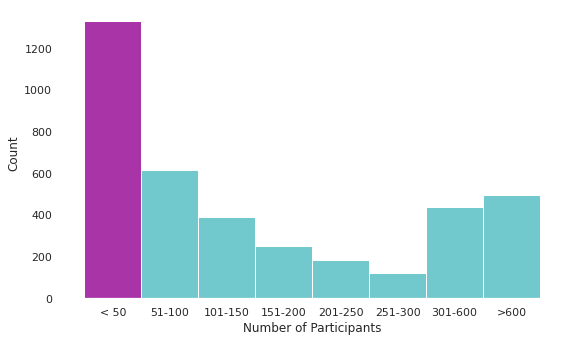

In [135]:
# Graph 19 -
# Number of Participants 

bar = sns.histplot(data=interventional_studies, x = 'Participant size_bins',color = '#42b7bd')

patch_h = [patch.get_height() for patch in bar.patches]   # patch_h contains the heights of all the patches now
plt.xlabel('Number of Participants',fontsize = 12)

idx_tallest = np.argmax(patch_h)  # np.argmax return the index of largest value of the list

# plot the histogram
bar.patches[idx_tallest].set_facecolor('#a834a8')  


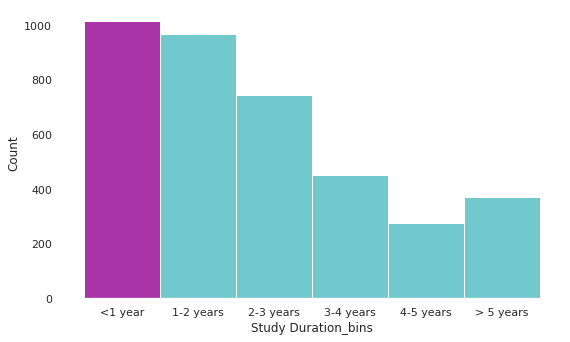

In [136]:
# Graph 20 -
# Study Duration

bar = sns.histplot(data = interventional_studies, x = 'Study Duration_bins',color = '#42b7bd')

patch_h = [patch.get_height() for patch in bar.patches]   # patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)  # np.argmax return the index of largest value of the list

# plot the histogram
bar.patches[idx_tallest].set_facecolor('#a834a8')  

Text(0.5, 0, 'Number of Countries')

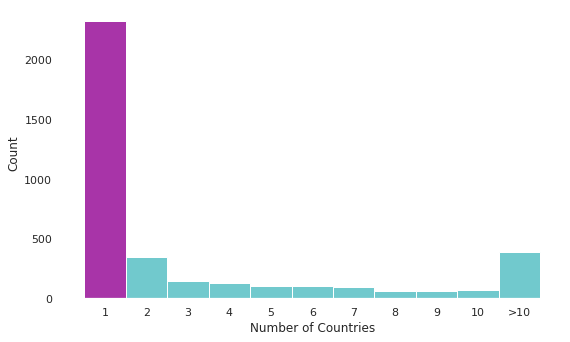

In [137]:
# Graph 21 -
# Number of countries 

bar = sns.histplot(data = interventional_studies, x = 'Number of countries_bins',color = '#42b7bd')

patch_h = [patch.get_height() for patch in bar.patches]   # patch_h contains the heights of all the patches now
plt.xlabel('Number of Countries',fontsize = 12)

idx_tallest = np.argmax(patch_h)  # np.argmax return the index of largest value of the list

# plot the histogram
bar.patches[idx_tallest].set_facecolor('#a834a8')  

Text(0.5, 0, 'Number of Clinical Trial Sites')

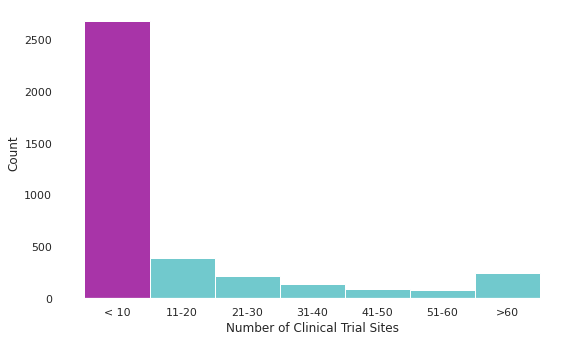

In [138]:
# Graph 22 -
# Number of clinical trial sites

bar = sns.histplot(data = interventional_studies, 
                   x = 'Number of Clinical Trial Sites_bins',
                   color = '#42b7bd')
plt.xlabel('Number of Clinical Trial Sites',fontsize = 12)
patch_h = [patch.get_height() for patch in bar.patches]   # patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)  # np.argmax return the index of largest value of the list

# plot the histogram
bar.patches[idx_tallest].set_facecolor('#a834a8') 

<Figure size 1008x432 with 0 Axes>

Text(0, 0.5, 'Number of IPCT')

Text(0.5, 0, 'Type of Outcome Measure Tools')

Text(0.0, 1698.0, '1693.0')

Text(1.0, 885.0, '880.0')

Text(2.0, 2177.0, '2172.0')

Text(3.0, 31.0, '26.0')

Text(4.0, 378.0, '373.0')

Text(5.0, 169.0, '164.0')

Text(6.0, 19.0, '14.0')

Text(7.0, 95.0, '90.0')

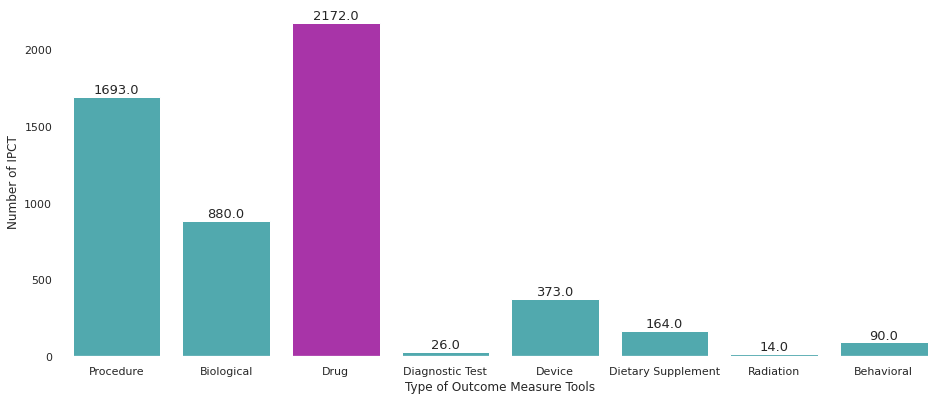

In [139]:
# Graph 23 -
# Intervention Types

# Set the x label
categories = ['Procedure','Biological','Drug','Diagnostic Test','Device',
            'Dietary Supplement','Radiation','Behavioral']
plt.figure(figsize = (14, 6))
sns.set(font_scale = 1)
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})
    
ax = sns.barplot(categories, interventional_studies.iloc[:,187:195].sum().values,color='#42b7bd')
plt.ylabel('Number of IPCT', fontsize = 12)
plt.xlabel('Type of Outcome Measure Tools', fontsize=12)
ax.tick_params(labelsize = 11)

#add the text labels
rects = ax.patches
labels = interventional_studies.iloc[:,187:195].sum().values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=13)
    patch_h = [patch.get_height() for patch in ax.patches]   
    idx_tallest = np.argmax(patch_h)   
    ax.patches[idx_tallest].set_facecolor('#a834a8')  # identify and recolour the tallest bar
    
plt.show()

Text(0, 0.5, 'Number of IPCT')

Text(0.5, 0, 'Number of Outcome Measure Tools')

Text(0.0, 1120.0, '1115')

Text(1.0, 185.0, '180')

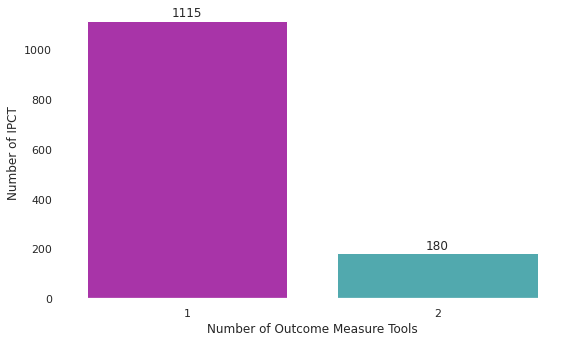

In [140]:
# Graph 24 -
# Number of Outcome Measures

rowSums = interventional_studies.iloc[:,184:186].sum(axis = 1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

# Set the font size and colours
sns.set(font_scale = 1.5)
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})

# Create the graph
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values,color = '#42b7bd')
plt.ylabel('Number of IPCT', fontsize = 12)
plt.xlabel('Number of Outcome Measure Tools', fontsize = 12)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va = 'bottom')
    patch_h = [patch.get_height() for patch in ax.patches]   
    idx_tallest = np.argmax(patch_h)   
    ax.patches[idx_tallest].set_facecolor('#a834a8') # identify and recolour the tallest bar
    
plt.show()

Text(0, 0.5, 'Number of IPCT')

Text(0.5, 0, 'Type of Outcome Measure Tools')

Text(0.0, 377.0, '372')

Text(1.0, 1108.0, '1103')

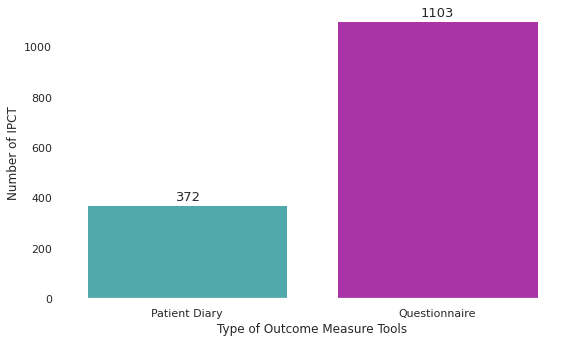

In [141]:
# Graph 25 -
# Type of Outcome Measures

# Set the X labels 
categories = ['Patient Diary','Questionnaire']

# Set the font size and colours
sns.set(font_scale = 1.5)
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})

# Create the graph
ax = sns.barplot(categories, interventional_studies.iloc[:,184:186].sum().values,color='#42b7bd')
plt.ylabel('Number of IPCT', fontsize = 12)
plt.xlabel('Type of Outcome Measure Tools', fontsize = 12)

#add the text labels
rects = ax.patches
labels = interventional_studies.iloc[:,184:186].sum().values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', 
            fontsize = 13)
    patch_h = [patch.get_height() for patch in ax.patches]   
    idx_tallest = np.argmax(patch_h)   
    ax.patches[idx_tallest].set_facecolor('#a834a8')  # identify and recolour the tallest bar
    
plt.show()

#### 3.2  Use of Outcome Measures by clinical trial characteristics

<AxesSubplot:ylabel='Disease Type'>

Text(0.5, 0, 'Disease Type')

Text(0, 0.5, 'Proportion')

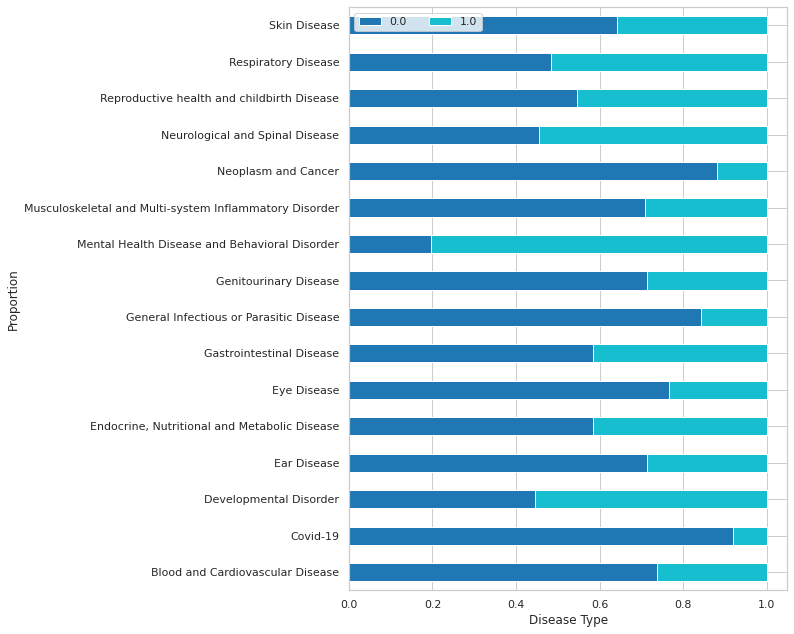

In [142]:
# Graph 26 -
# By disease type

DiseaseStudied = interventional_studies[interventional_studies['Disease Type'] != 'Others']
sns.set_theme(style = "whitegrid")

cross_tab_prop = pd.crosstab(index = DiseaseStudied['Disease Type'],
                            # create pivot table to show clinical trials with and without outcome measures                             
                             columns = interventional_studies['Outcome Measures (Y/N)'],
                             normalize = "index")


cross_tab_prop.plot(kind = 'barh', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (7, 10),
                    )

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Disease Type")
plt.ylabel("Proportion")

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x7f668ad6f520>,
 [Text(0.0, 0, 'unitedstates'),
  Text(1.0, 0, 'germany'),
  Text(2.0, 0, 'spain'),
  Text(3.0, 0, 'unitedkingdom'),
  Text(4.0, 0, 'poland'),
  Text(5.0, 0, 'italy'),
  Text(6.0, 0, 'canada'),
  Text(7.0, 0, 'france'),
  Text(8.0, 0, 'australia'),
  Text(9.0, 0, 'russianfederation'),
  Text(10.0, 0, 'belgium'),
  Text(11.0, 0, 'hungary'),
  Text(12.0, 0, 'japan'),
  Text(13.0, 0, 'netherlands'),
  Text(14.0, 0, 'israel'),
  Text(15.0, 0, 'republicof'),
  Text(16.0, 0, 'korea'),
  Text(17.0, 0, 'czechia'),
  Text(18.0, 0, 'mexico'),
  Text(19.0, 0, 'ukraine')])

Text(0.5, 0, 'Country')

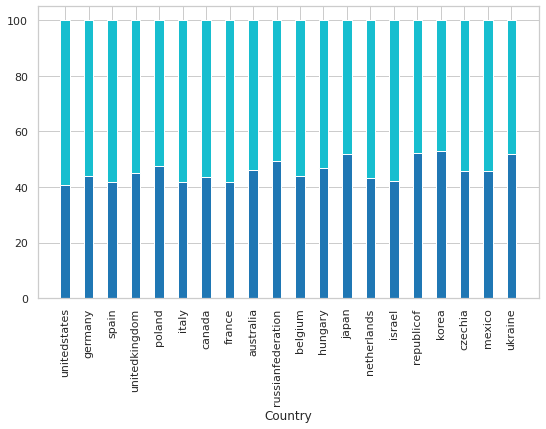

In [143]:
# Graph 27 -
# By Country

# Filter the clinical trials without outcome measures
a = interventional_studies[(interventional_studies['Listed Location Countries']!='republicof') & 
                                      (interventional_studies['Listed Location Countries']!='notprovided') &
                                      (interventional_studies['Outcome Measures (Y/N)'] == 0)]

# Calculate the number of occurence of each country
list_= a['Listed Location Countries'].dropna().to_list()
list_ = list(dict.fromkeys(list_))
list_2 = [row for row in list_ if row.strip()]
text = str(list_2)
text = re.sub(r"[-()[]\"''#/@;:<>{}`+=~|.!?]", "",text).lower()
text = text.replace("[",'').replace("'",'').replace(" ",'')
d = dict()
for word in text.split(','):
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
        
a = pd.DataFrame.from_dict([d]).T
a.index.name = 'Location'
a = a.reset_index().rename(columns = {0:'Outcome Measures - N'})

# Filter the clinical trials with outcome measures
b = interventional_studies[(interventional_studies['Listed Location Countries']!='republicof') & 
                                      (interventional_studies['Listed Location Countries']!='notprovided') &
                                      (interventional_studies['Outcome Measures (Y/N)'] == 1)]

# Calculate the number of occurence of each country
list_= b['Listed Location Countries'].dropna().to_list()
list_ = list(dict.fromkeys(list_))
list_2 = [row for row in list_ if row.strip()]
text = str(list_2)
text = re.sub(r"[-()[]\"''#/@;:<>{}`+=~|.!?]", "",text).lower()
text = text.replace("[",'').replace("'",'').replace(" ",'')
d = dict()
for word in text.split(','):
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
        
b = pd.DataFrame.from_dict([d]).T
b.index.name = 'Location'
b = b.reset_index().rename(columns = {0:"Outcome Measures - Y"})

Countries_combined = a.merge(b, on = ['Location'])
Countries_combined = Countries_combined.sort_values(by = 'Outcome Measures - Y',ascending = False)[:20]
Countries_combined['Total'] = Countries_combined['Outcome Measures - Y'] + Countries_combined['Outcome Measures - N']

greenBars = [i / j * 100 for i,j in zip(Countries_combined['Outcome Measures - Y'], Countries_combined['Total'])]
blueBars = [i / j * 100 for i,j in zip(Countries_combined['Outcome Measures - N'], Countries_combined['Total'])]
 
# plot
barWidth = 0.4
names = Countries_combined['Location'].values
# Create green Bars
plt.bar(Countries_combined['Location'], greenBars, color = 'tab:blue', 
        edgecolor = 'white', width = barWidth)
# Create orange Bars
# Create blue Bars
plt.bar(Countries_combined['Location'], blueBars, bottom = greenBars, 
        color = 'tab:cyan', edgecolor = 'white', width = barWidth)
 
# Custom x axis
plt.xticks(Countries_combined['Location'], names, rotation = 'vertical')

plt.xlabel('Country')
# Show graphic
plt.show()

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

([<matplotlib.axis.XTick at 0x7f661ccc7550>,
 [Text(0.0, 0, 'oral'),
  Text(1.0, 0, 'injection'),
  Text(2.0, 0, 'inhalation'),
  Text(3.0, 0, 'nasal'),
  Text(4.0, 0, 'otic'),
  Text(5.0, 0, 'ocular'),
  Text(6.0, 0, 'cutaneous'),
  Text(7.0, 0, 'nebulization'),
  Text(8.0, 0, 'vaginal'),
  Text(9.0, 0, 'sublingual'),
  Text(10.0, 0, 'buccal'),
  Text(11.0, 0, 'transdermal')])

Text(0.5, 0, 'Drug/Biological Delivery')

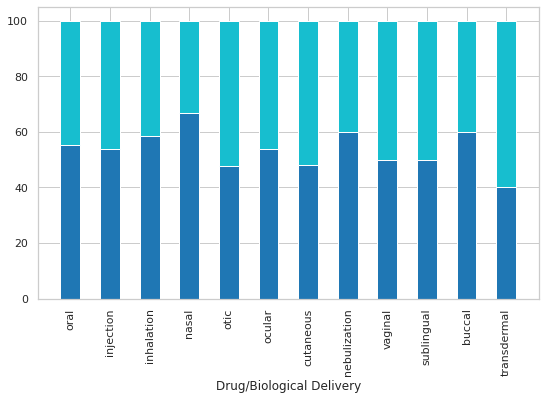

In [144]:
# Graph 28 -
# By Drug Delivery Methods

# Filter the clinical trials without outcome measures
a = interventional_studies[(interventional_studies['Drug/Biological Delivery'] != 'nil') & 
                           (interventional_studies['Drug/Biological Delivery'] != 'notprovided') & 
                           (interventional_studies['Outcome Measures (Y/N)'] == 0)]

# Calculate the number of occurence of each drug delivery method
list_ = a['Drug/Biological Delivery'].dropna().to_list()
list_ = list(dict.fromkeys(list_))
list_2 = [row for row in list_ if row.strip()]
text = str(list_2)
text = re.sub(r"[-()[]\"''#/@;:<>{}`+=~|.!?]", "",text).lower()
text = text.replace("[",'').replace("'",'').replace(" ",'')
d = dict()
for word in text.split(','):
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
        
a = pd.DataFrame.from_dict([d]).T
a.index.name = 'Drug/Biological Delivery'
a = a.reset_index().rename(columns = {0:'Outcome Measures - N'})

# Filter the clinical trials with outcome measures
b = interventional_studies[(interventional_studies['Drug/Biological Delivery'] != 'nil') & 
                           (interventional_studies['Drug/Biological Delivery'] != 'notprovided') & 
                           (interventional_studies['Outcome Measures (Y/N)'] == 1)]

# Calculate the number of occurence of each drug delivery method
list_ = b['Drug/Biological Delivery'].dropna().to_list()
list_ = list(dict.fromkeys(list_))
list_2 = [row for row in list_ if row.strip()]
text = str(list_2)
text = re.sub(r"[-()[]\"''#/@;:<>{}`+=~|.!?]", "",text).lower()
text = text.replace("[",'').replace("'",'').replace(" ",'')
d = dict()
for word in text.split(','):
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
        
b = pd.DataFrame.from_dict([d]).T
b.index.name = 'Drug/Biological Delivery'
b = b.reset_index().rename(columns = {0:"Outcome Measures - Y"})

Methods_combined = a.merge(b, on = ['Drug/Biological Delivery'])
Methods_combined = Methods_combined.sort_values(by='Outcome Measures - Y',ascending = False)[:20]
Methods_combined['Total'] = Methods_combined['Outcome Measures - Y'] + Methods_combined['Outcome Measures - N']
Methods_combined = Methods_combined.loc[(Methods_combined['Drug/Biological Delivery'] != 'nil')]
Methods_combined = Methods_combined.loc[(Methods_combined['Drug/Biological Delivery'] != 'notprovided')]

greenBars = [i / j * 100 for i,j in zip(Methods_combined['Outcome Measures - Y'], Methods_combined['Total'])]
blueBars = [i / j * 100 for i,j in zip(Methods_combined['Outcome Measures - N'], Methods_combined['Total'])]
 
# plot
names = Methods_combined['Drug/Biological Delivery'].values
# Create green Bars
plt.bar(Methods_combined['Drug/Biological Delivery'], greenBars, color = 'tab:blue', 
        edgecolor = 'white', width = 0.5)
# Create orange Bars
# Create blue Bars
plt.bar(Methods_combined['Drug/Biological Delivery'], blueBars, bottom = greenBars, color = 'tab:cyan', 
        edgecolor = 'white', width = 0.5)
 
# Custom x axis
plt.xticks(Methods_combined['Drug/Biological Delivery'], names, rotation = 'vertical')
plt.xlabel("Drug/Biological Delivery")
# Show graphic
plt.show()


<AxesSubplot:ylabel='Big Names Sponsors'>

Text(0.5, 0, 'Sponsors')

Text(0, 0.5, 'Proportion')

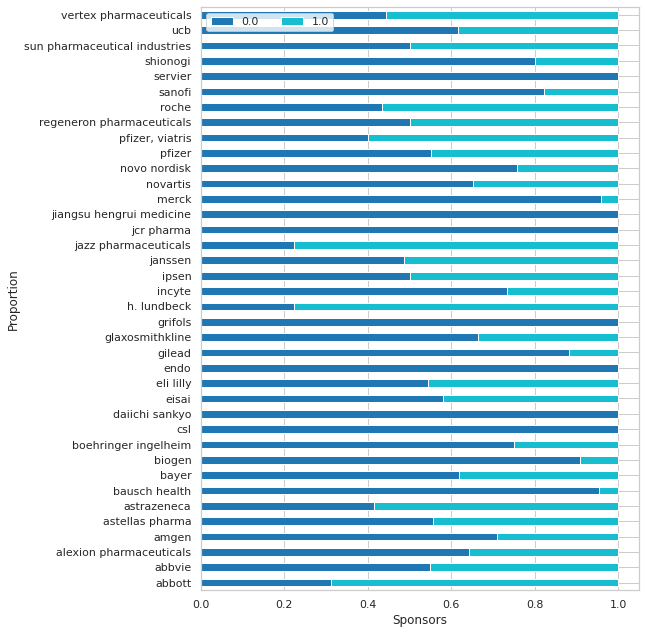

In [145]:
# Graph 29 -
# By sponsors

sponsors = interventional_studies.loc[interventional_studies['Big Names Sponsors'] != 'No']
cross_tab_prop = pd.crosstab(index = sponsors['Big Names Sponsors'],
                             columns = sponsors['Outcome Measures (Y/N)'],
                             normalize = "index")
cross_tab_prop.plot(kind = 'barh', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (7, 10),
                   )

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Sponsors")
plt.ylabel("Proportion")
barWidth = 0.8

<AxesSubplot:xlabel='Year Started'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Proportion')

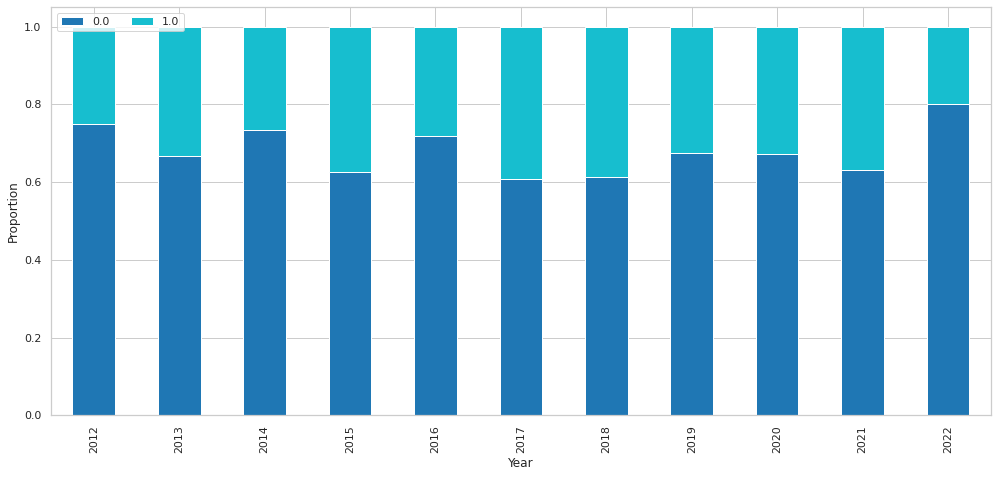

In [146]:
# Graph 30 -
# By Year Started

cross_tab_prop = pd.crosstab(index = interventional_studies['Year Started'],
                             columns = interventional_studies['Outcome Measures (Y/N)'],
                             normalize = "index")


cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.barWidth = 0.1

<AxesSubplot:xlabel='Number of countries_bins'>

Text(0.5, 0, 'Number of countries')

Text(0, 0.5, 'Proportion')

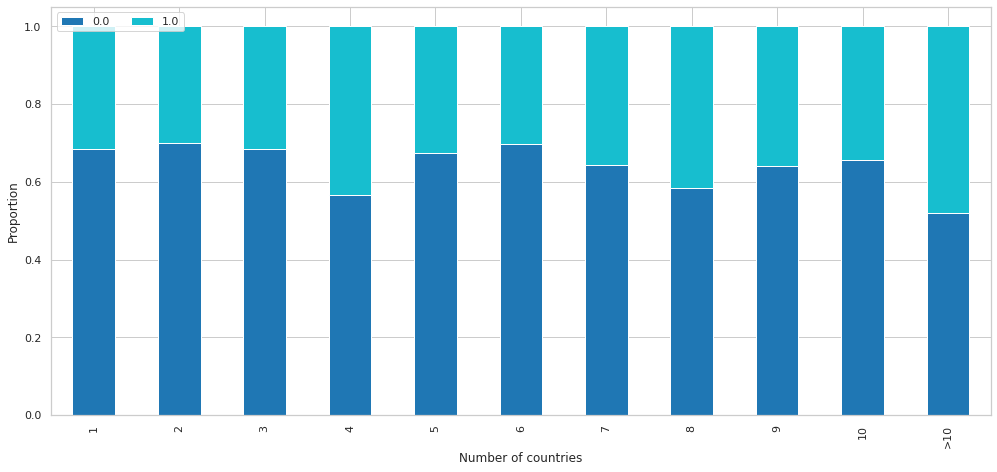

In [147]:
# Graph 31 -
# By Number of Countries

cross_tab_prop = pd.crosstab(index = interventional_studies['Number of countries_bins'],
                             columns = interventional_studies['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Number of countries")
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Number of Clinical Trial Sites_bins'>

Text(0.5, 0, 'Number of Clinical Trial Sites')

Text(0, 0.5, 'Proportion')

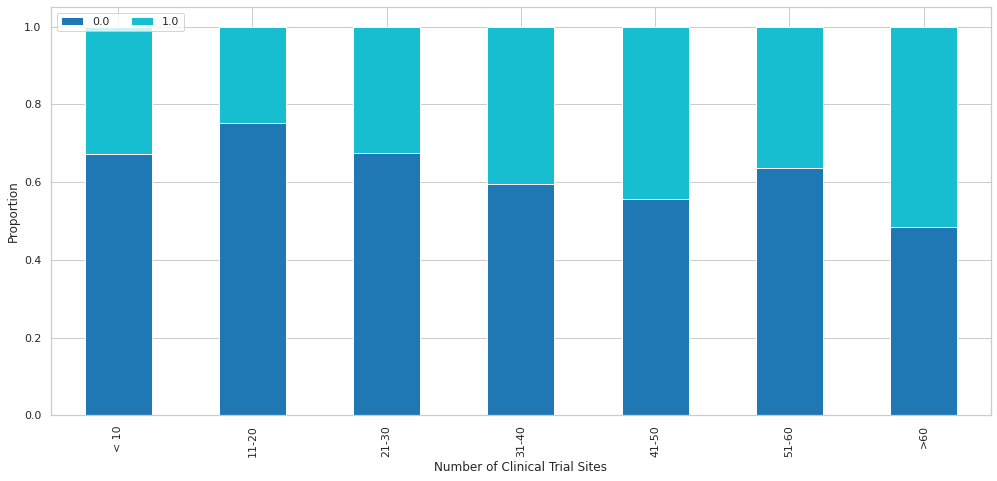

In [148]:
# Graph 32 -
# By Number of Clinial Trial Sites

cross_tab_prop = pd.crosstab(index = interventional_studies['Number of Clinical Trial Sites_bins'],
                             columns = interventional_studies['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Number of Clinical Trial Sites")
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Study Duration_bins'>

Text(0.5, 0, 'Study Duration')

Text(0, 0.5, 'Proportion')

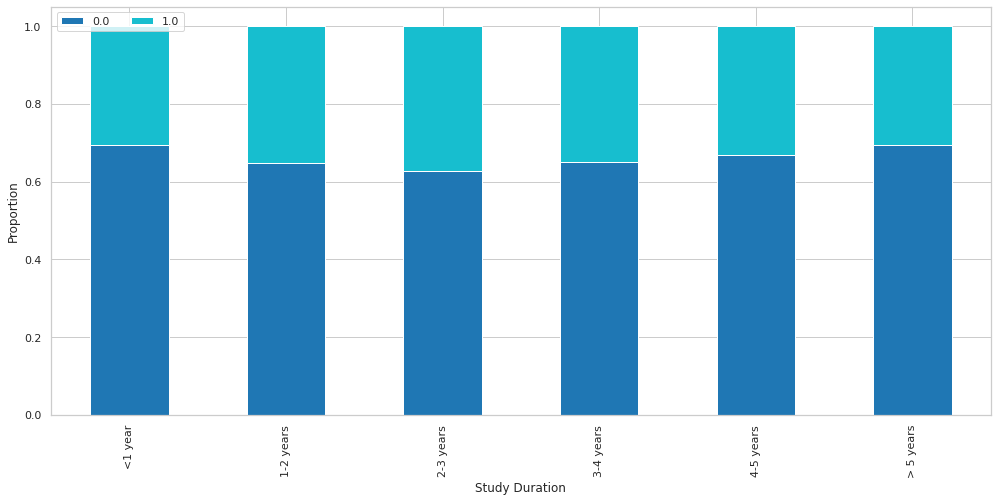

In [149]:
# Graph 33 -
# By Study Duration

cross_tab_prop = pd.crosstab(index = interventional_studies['Study Duration_bins'],
                             columns = interventional_studies['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Study Duration")
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Number of Arms'>

Text(0.5, 0, 'Number of Arms')

Text(0, 0.5, 'Proportion')

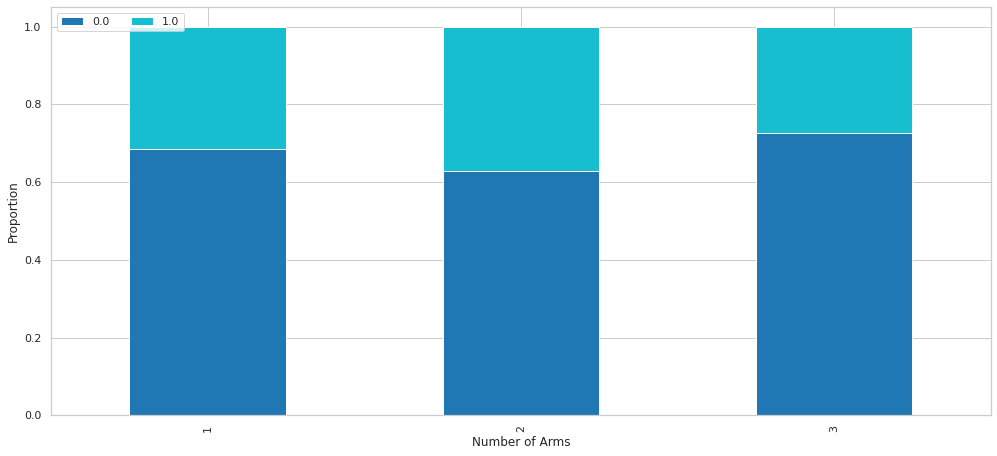

In [150]:
# Graph 34 -
# By Number of Arms

cross_tab_prop = pd.crosstab(index = interventional_studies['Number of Arms'],
                             columns = interventional_studies['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Number of Arms")
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Placebo (Y/N)'>

Text(0.5, 0, 'Placebo (Y/N)')

Text(0, 0.5, 'Proportion')

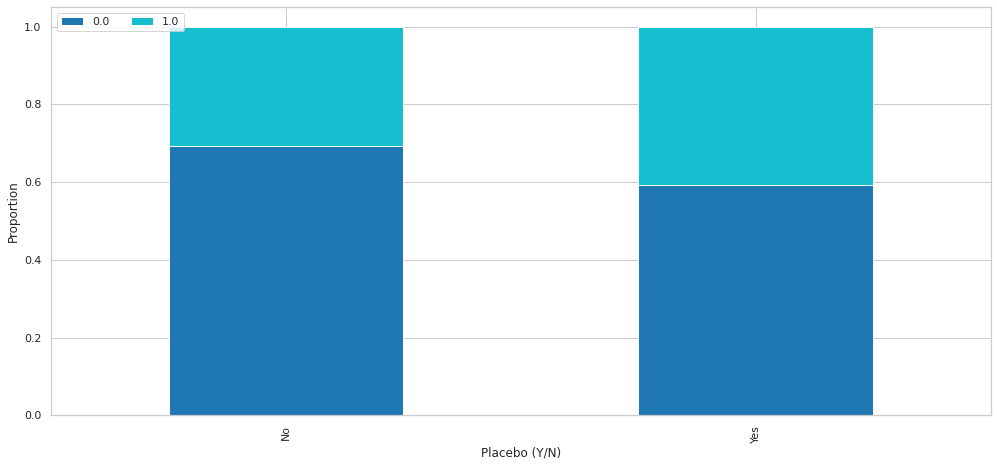

In [151]:
# Graph 35 -
# By use of Placebo

cross_tab_prop = pd.crosstab(index = interventional_studies['Placebo (Y/N)'],
                             columns = interventional_studies['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Placebo (Y/N)")
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Primary Purpose'>

Text(0.5, 0, 'Primary Purpose')

Text(0, 0.5, 'Proportion')

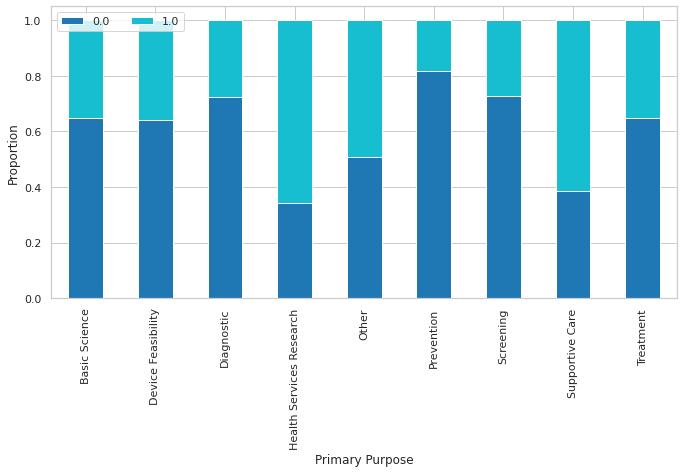

In [152]:
# Graph 36 -
# By Primary Purpose

a = interventional_studies[interventional_studies['Primary Purpose'] != 'Not Provided']

cross_tab_prop = pd.crosstab(index = a['Primary Purpose'],
                             columns = a['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (10, 5))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Primary Purpose")
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Age (min) years'>

Text(0.5, 0, 'Age (min) years')

Text(0, 0.5, 'Proportion')

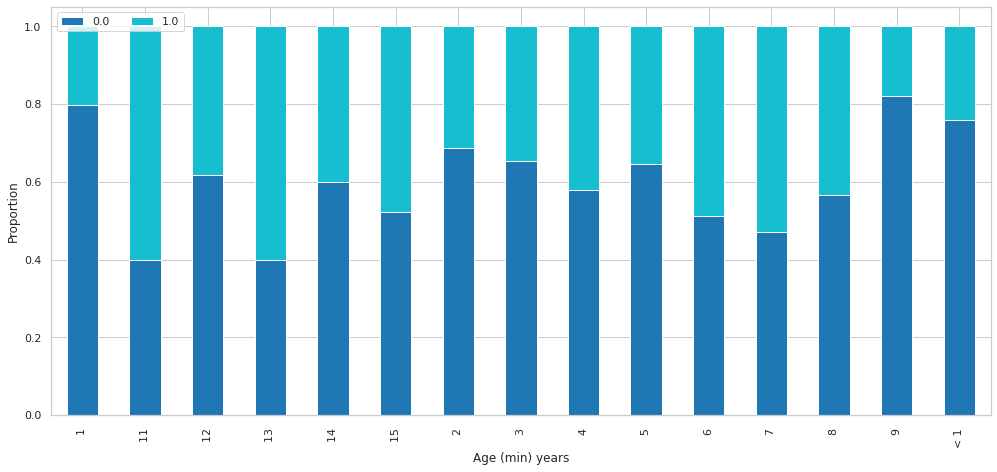

In [153]:
# Graph 37 -
# By Minimum Age

a = interventional_studies.loc[interventional_studies['Age (min) years'] != 'Not Provided']
cross_tab_prop = pd.crosstab(index = a['Age (min) years'],
                             columns = a['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel("Age (min) years")
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Masking'>

Text(0.5, 0, 'Masking')

Text(0, 0.5, 'Proportion')

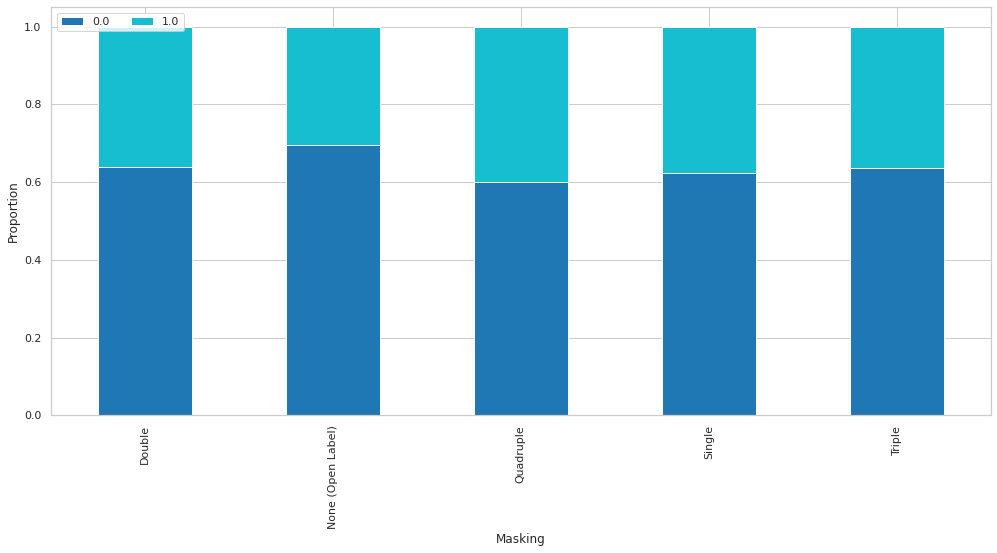

In [154]:
# Graph 38 -
# By Masking Type

a = interventional_studies.loc[interventional_studies['Masking'] != 'Not Provided']
cross_tab_prop = pd.crosstab(index = a['Masking'],
                             columns = a['Outcome Measures (Y/N)'],
                             normalize = "index")

cross_tab_prop.plot(kind = 'bar', mark_right = True,
                    stacked = True, 
                    colormap = 'tab10', 
                    figsize = (15, 7))

plt.legend(loc = "upper left", ncol = 2)
plt.xlabel('Masking')
plt.ylabel("Proportion")

(-0.5, 999.5, 399.5, -0.5)

Text(0.5, 1.0, 'Most Studied Conditions')

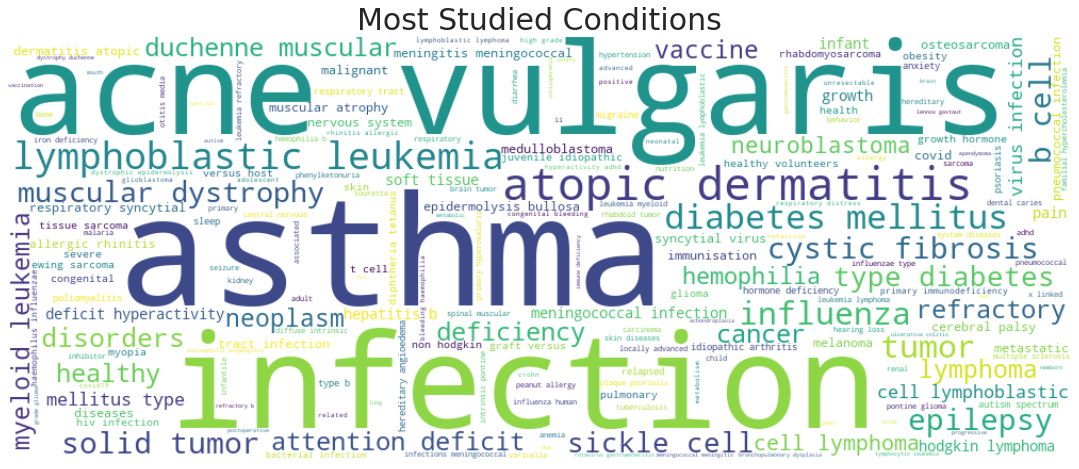

In [155]:
# Graph 39 -
# Most studied disease

# Removing irrelevant words
remove_words = list(map(str.lower,['Acute','deficieny','pediatric','disease','Chronic','children',
                                 'Syndrome','Recurrent','Childhood','Disorder','Moderate','Advance',
                                 ]))
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

# plot the wordcloud
interventional_studies['CONDITION/DISEASE_cleaned'] = interventional_studies['CONDITION/DISEASE'].str.lower().str.replace(pat, '')
fig, (ax2) = plt.subplots(1,1,figsize = [17, 10])
wordcloud2 = WordCloud(background_color='white',width = 1000,height = 400
                      ).generate(" ".join(interventional_studies['CONDITION/DISEASE_cleaned']))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Studied Conditions',fontsize = 30)